## Data Analysis with Python
## Project Name: Most Watched Movies and TV Shows                         
   Author: Shah Paran

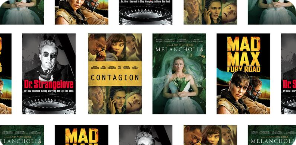


#2024 TV Show Watchtime Analysis: Trends & Insights
Dive into a detailed exploration of TV show watchtime trends for 2024, featuring top-performing titles ranked by premiere year, genre, and total watchtime in millions. This dataset provides valuable insights into audience preferences across diverse genres, including Action, Drama, Thriller, Fantasy, and Crime, highlighting viewer engagement patterns in the evolving world of television entertainment.

Whether analyzing genre dominance, watchtime distribution, or emerging trends, this dataset serves as a powerful tool for understanding how audiences shape the entertainment industry.

#Expected output Visualization Charts:
- Bar Chart: Compare watchtime across genres or top-ranked titles.
- Line Chart: Show trends in watchtime based on premiere years.
- Pie Chart: Visualize the proportion of different genres.
- Scatter Plot: Check the correlation between premiere year and watchtime.
- Heatmap: Analyze the distribution of watchtime by genre and year.


Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
!pip install opendatasets
import opendatasets as od
import os

In [ ]:
dataset_url = '/content/Most Watched Movies and TV Shows.csv'

In [ ]:
data_dir = '/content/Most Watched Movies and TV Shows.csv'

In [ ]:
import pandas as pd
Watched_Movies_df = pd.read_csv('/content/Most Watched Movies and TV Shows.csv')

In [ ]:
Watched_Movies_df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18164 entries, 0 to 18163
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  18164 non-null  int64  
 1   Title                 18164 non-null  object 
 2   Type                  18164 non-null  object 
 3   Premiere              18030 non-null  float64
 4   Genre                 17984 non-null  object 
 5   Watchtime             18164 non-null  object 
 6   Watchtime in Million  18164 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 993.5+ KB


Let us save our work before continuing.

## Data Preparation and Cleaning
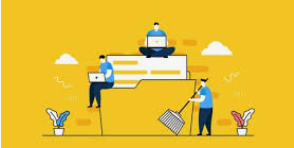
**TODO** - Write some explanation here.

> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

**Python Code for Data Cleaning: import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from IPython.display import display, HTML
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px
import scipy.stats as stats

In [ ]:
dataset_url = '/content/Most Watched Movies and TV Shows.csv'

In [ ]:
Watched_Movies_df = pd.read_csv('/content/Most Watched Movies and TV Shows.csv')

In [ ]:
Watched_Movies_df

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1,The Night Agent,TV Show,2023.0,Action,"812,100,000",812.1M
1,2,Ginny & Georgia,TV Show,2021.0,Drama,"665,100,000",665.1M
2,3,The Glory,TV Show,2022.0,Thriller,"622,800,000",622.8M
3,4,Wednesday,TV Show,2022.0,Fantasy,"507,700,000",507.7M
4,5,Queen Charlotte: A Bridgerton Story,TV Show,2023.0,Drama,"503,000,000",503.0M
...,...,...,...,...,...,...,...
18159,18210,Spiritual House,TV Show,2017.0,Talk Show,"100,000",0.1M
18160,18211,Suite Francaise,Movie,2014.0,War,"100,000",0.1M
18161,18212,The Bishop's Bedroom,Movie,1977.0,Comedy,"100,000",0.1M
18162,18213,30 Chưa Phải Tết,Movie,2020.0,Comedy,"100,000",0.1M


In [ ]:
Watched_Movies_df.columns

Index(['Rank', 'Title', 'Type', 'Premiere', 'Genre', 'Watchtime',
       'Watchtime in Million'],
      dtype='object')

In [ ]:
Watched_Movies_df.describe()

,Rank,Premiere
count,18164.000000,18030.000000
mean,9126.719335,2014.188297
std,5252.511432,8.844017
min,1.000000,1940.000000
25%,4591.750000,2012.000000
50%,9132.500000,2017.000000
75%,13673.250000,2020.000000
max,18214.000000,2023.000000


In [ ]:
type(Watched_Movies_df)

pandas.core.frame.DataFrame

In [ ]:
schema_fname = '/content/Most Watched Movies and TV Shows.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Genre')
schema_raw

,Rank,Title,Type,Premiere,Watchtime,Watchtime in Million
Genre,,,,,,
Action,1,The Night Agent,TV Show,2023.0,"812,100,000",812.1M
Drama,2,Ginny & Georgia,TV Show,2021.0,"665,100,000",665.1M
Thriller,3,The Glory,TV Show,2022.0,"622,800,000",622.8M
Fantasy,4,Wednesday,TV Show,2022.0,"507,700,000",507.7M
Drama,5,Queen Charlotte: A Bridgerton Story,TV Show,2023.0,"503,000,000",503.0M
...,...,...,...,...,...,...
Talk Show,18210,Spiritual House,TV Show,2017.0,"100,000",0.1M
War,18211,Suite Francaise,Movie,2014.0,"100,000",0.1M
Comedy,18212,The Bishop's Bedroom,Movie,1977.0,"100,000",0.1M


In [ ]:
print(schema_raw.head())

          Rank                                Title     Type  Premiere  \
Genre                                                                    
Action       1                      The Night Agent  TV Show    2023.0   
Drama        2                      Ginny & Georgia  TV Show    2021.0   
Thriller     3                            The Glory  TV Show    2022.0   
Fantasy      4                            Wednesday  TV Show    2022.0   
Drama        5  Queen Charlotte: A Bridgerton Story  TV Show    2023.0   

            Watchtime Watchtime in Million  
Genre                                       
Action    812,100,000               812.1M  
Drama     665,100,000               665.1M  
Thriller  622,800,000               622.8M  
Fantasy   507,700,000               507.7M  
Drama     503,000,000               503.0M  


In [ ]:
print(Watched_Movies_df.head())

   Rank                                Title     Type  Premiere     Genre  \
0     1                      The Night Agent  TV Show    2023.0    Action   
1     2                      Ginny & Georgia  TV Show    2021.0     Drama   
2     3                            The Glory  TV Show    2022.0  Thriller   
3     4                            Wednesday  TV Show    2022.0   Fantasy   
4     5  Queen Charlotte: A Bridgerton Story  TV Show    2023.0     Drama   

     Watchtime Watchtime in Million  
0  812,100,000               812.1M  
1  665,100,000               665.1M  
2  622,800,000               622.8M  
3  507,700,000               507.7M  
4  503,000,000               503.0M  


In [ ]:
print(Watched_Movies_df.isnull().sum())

Rank                      0
Title                     0
Type                      0
Premiere                134
Genre                   180
Watchtime                 0
Watchtime in Million      0
dtype: int64


In [ ]:
Watched_Movies_df.fillna(0, inplace=True)

In [ ]:
Watched_Movies_df.dropna(inplace=True)

In [ ]:
print("Missing values:\n", Watched_Movies_df.isnull())

Missing values:
         Rank  Title   Type  Premiere  Genre  Watchtime  Watchtime in Million
0      False  False  False     False  False      False                 False
1      False  False  False     False  False      False                 False
2      False  False  False     False  False      False                 False
3      False  False  False     False  False      False                 False
4      False  False  False     False  False      False                 False
...      ...    ...    ...       ...    ...        ...                   ...
18159  False  False  False     False  False      False                 False
18160  False  False  False     False  False      False                 False
18161  False  False  False     False  False      False                 False
18162  False  False  False     False  False      False                 False
18163  False  False  False     False  False      False                 False

[18164 rows x 7 columns]


In [ ]:
print(Watched_Movies_df.duplicated().sum())

0


In [ ]:
Watched_Movies_df.drop_duplicates(inplace=True)

In [ ]:
Watched_Movies_df.to_csv("cleaned_data.csv", index=False)


In [ ]:
Watched_Movies_df

,Rank,Title,Type,Premiere,Genre,Watchtime,Watchtime in Million
0,1,The Night Agent,TV Show,2023.0,Action,"812,100,000",812.1M
1,2,Ginny & Georgia,TV Show,2021.0,Drama,"665,100,000",665.1M
2,3,The Glory,TV Show,2022.0,Thriller,"622,800,000",622.8M
3,4,Wednesday,TV Show,2022.0,Fantasy,"507,700,000",507.7M
4,5,Queen Charlotte: A Bridgerton Story,TV Show,2023.0,Drama,"503,000,000",503.0M
...,...,...,...,...,...,...,...
18159,18210,Spiritual House,TV Show,2017.0,Talk Show,"100,000",0.1M
18160,18211,Suite Francaise,Movie,2014.0,War,"100,000",0.1M
18161,18212,The Bishop's Bedroom,Movie,1977.0,Comedy,"100,000",0.1M
18162,18213,30 Chưa Phải Tết,Movie,2020.0,Comedy,"100,000",0.1M


## Exploratory Analysis and Visualization

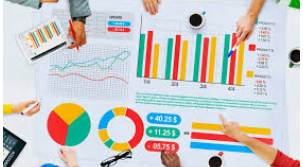
**TODO** - write some explanation here.



> Instructions (delete this cell)
>
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

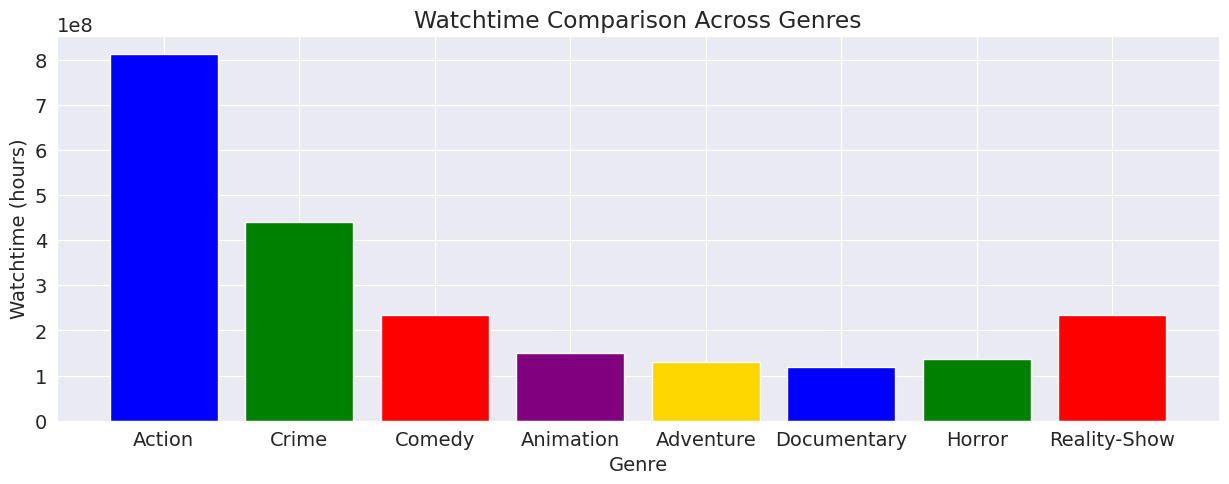

In [ ]:
# 1. Bar Chart: Compare watchtime across genres(Movies) or top-ranked titles

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5)) # Create the figure with a larger size

genres = ['Action', 'Crime', 'Comedy', 'Animation','Adventure','Documentary','Horror','Reality-Show']
watchtime = [812100000,440600000, 234800000, 149300000,130700000,118900000,136800000,235000000]
plt.bar(genres, watchtime, color=['blue', 'green', 'red', 'purple','gold'])

plt.xlabel('Genre')
plt.ylabel('Watchtime (hours)')
plt.title('Watchtime Comparison Across Genres')
plt.show() # Show the chart

In [ ]:
Watched_Movies_df

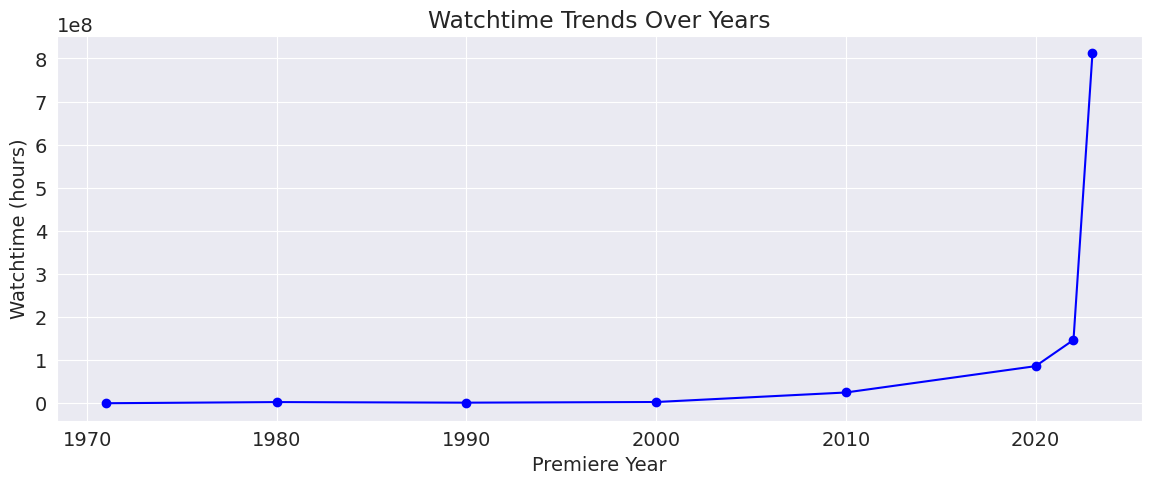

In [ ]:
# 2. Line Chart: Show trends in watchtime based on premiere (years)

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5)) # Create the figure with a larger size

years = [1971, 1980,1990, 2000,2010,2020,2022,2023]
watchtime = [100000, 2700000,1400000, 2900000,25000000,86100000,146900000,812100000]

plt.plot(years, watchtime, marker='o', linestyle='-', color='blue')
plt.xlabel('Premiere Year')
plt.ylabel('Watchtime (hours)')
plt.title('Watchtime Trends Over Years')
plt.show()


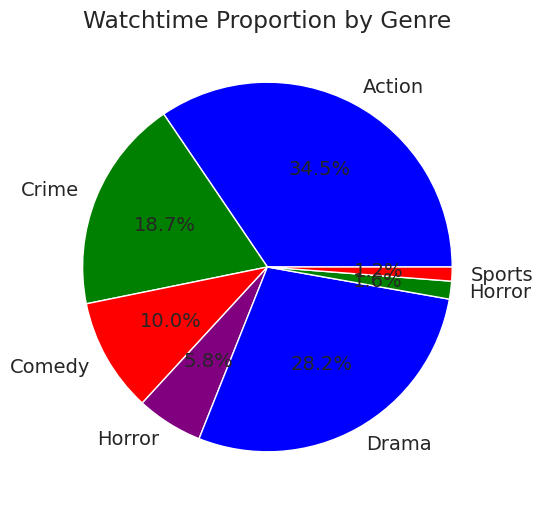

In [ ]:
#3. Pie Chart: Visualize the proportion of different genres
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6)) # Create the figure with a larger size

genres = ['Action','Crime', 'Comedy','Horror', 'Drama', 'Horror','Sports']
watchtime = [812100000,440600000, 234800000,136800000, 665100000, 36800000,28800000]

# Plot pie chart
plt.pie(watchtime, labels=genres, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple'])
plt.title('Watchtime Proportion by Genre')

# Show plot
plt.show()




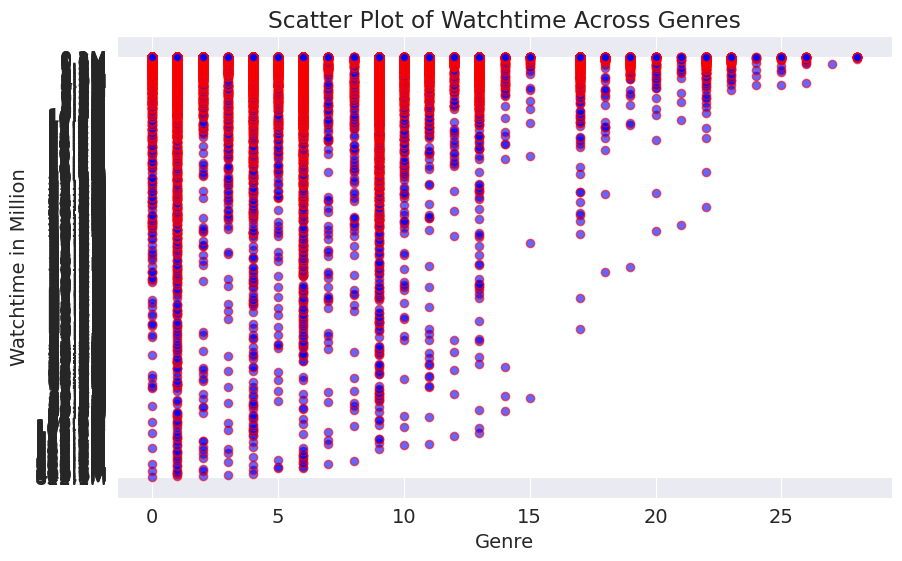

In [ ]:
import matplotlib.pyplot as plt

# Ensure Genre is treated as categorical
x = Watched_Movies_df['Genre'].astype(str).unique()  # Get unique genres
genre_mapping = {genre: idx for idx, genre in enumerate(x)}  # Assign numeric values

x_numeric = Watched_Movies_df['Genre'].map(genre_mapping)  # Convert genres to numbers
y = Watched_Movies_df['Watchtime in Million']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_numeric, y, color='blue', alpha=0.6, edgecolors='red')

# Add titles and labels
plt.xlabel("Genre")
plt.ylabel("Watchtime in Million")
plt.title("Scatter Plot of Watchtime Across Genres")

# Set x-ticks using original genre names
#plt.xticks(ticks=genre_mapping.values(), labels=genre_mapping.keys(), rotation=90)

# Show the plot
plt.show()

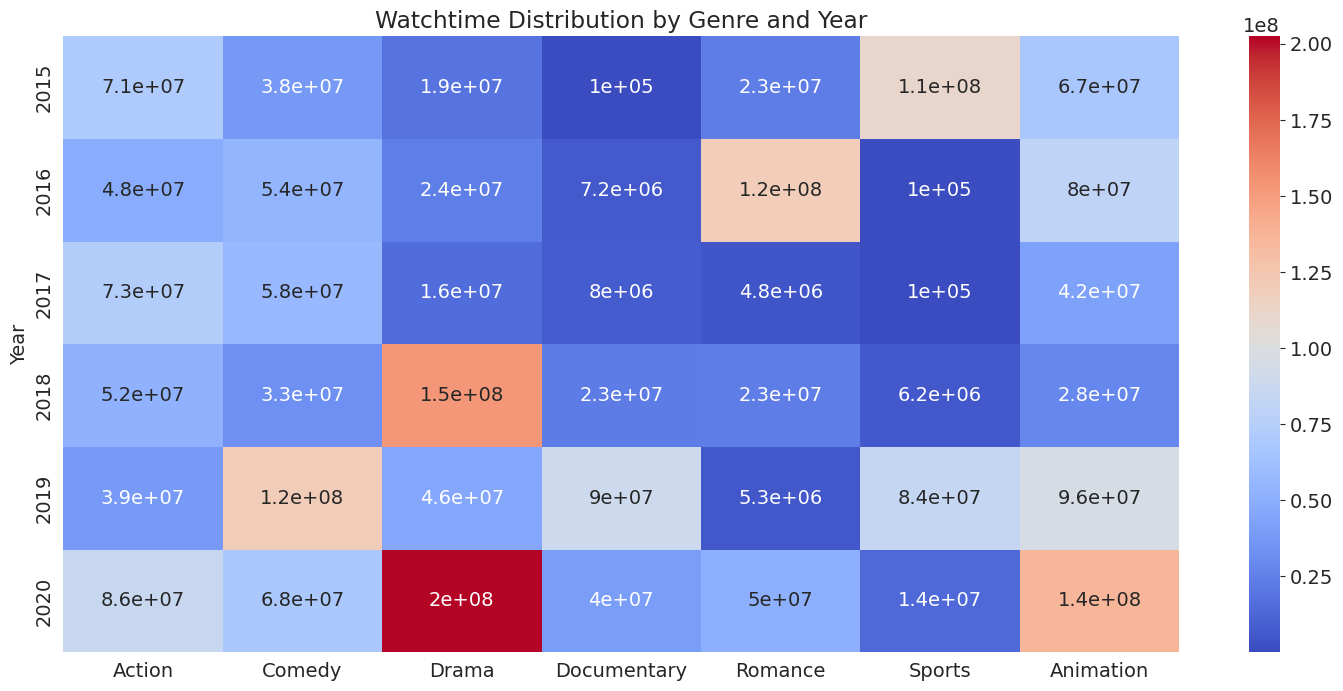

In [ ]:
# 5. Heatmap: Analyze the distribution of watchtime by genre and year

import seaborn as sns
import pandas as pd

plt.figure(figsize=(18, 8))  # Set figure size

# Sample data
data = pd.DataFrame({'Year': [2015, 2016, 2017, 2018, 2019, 2020],
                     'Action': [71000000, 48500000, 73100000, 52000000, 38600000, 86100000],
                     'Comedy': [37800000, 54400000, 57500000, 32700000, 120300000, 68300000],
                     'Drama': [18600000, 24100000, 15500000, 153000000, 45900000, 202500000],
                     'Documentary':[100000,7200000,8000000,22800000,90200000,40300000],
                     'Romance':[23100000,120000000,4800000,23200000,5300000,50000000],
                     'Sports':[110000000,100000,100000,6200000,84000000,14000000],
                     'Animation': [67000000, 80500000, 42100000, 27900000, 95800000, 136200000]})

#plt.figure(figsize=(8, 6))
sns.heatmap(data.set_index('Year'), cmap='coolwarm', annot=True)
plt.title('Watchtime Distribution by Genre and Year')
plt.show()

##  Conclusion
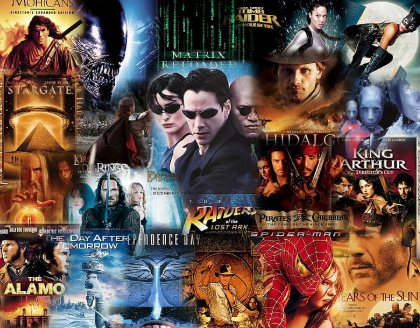




Key Findings from the Most-Watched Movies and TV Shows
This analysis of the most-watched movies and TV shows reveals clear patterns in viewer preferences, genre popularity, and watchtime trends across the years. Drama, thriller, and crime genres consistently dominate, while newer releases tend to attract higher viewership. TV shows appear to drive higher engagement overall compared to movies, possibly due to multi-episode formats. Additionally, historical and fantasy genres maintain a loyal audience, proving that storytelling diversity is key to sustained popularity.

Understanding these trends provides valuable insights into how audience preferences shape the entertainment industry, offering predictions on future viewership trends.
 📊
